### **Paquetes Descriptivos**

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2176943 sha256=2cfa6dc358a6af222464b2b2029bc80307916134421f951a7540f921b6ba10db
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [ ]:
import pandas as pd #para manipular y analizar datos
import numpy as np #para operaciones matematicas y estadisticas con los datos
import seaborn as sns #para visualizacion de datos (graficos)
import matplotlib.pyplot as plt #para visualizacion de datos (graficos)

from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
#from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_excel('/content/2_MundoDemográfico.xlsx', sheet_name='BASE')
df

,id,country,income,continent,region,gdppc,death,mdeath,fdeath,deathrate,lifeE,lifeEM,lifeEF,infantD,infantMR,underfiveM,births,birthsCR,fer
0,2384,Somalia,1,Africa,Eastern Africa,629,165.4,88.5,76.9,10.9,57.1,55.5,58.9,44.7,68.7,113.7,650.7,42.7,6.1
1,3149,Central African Republic,1,Africa,Middle Africa,689,60.7,32.0,28.7,12.7,53.6,51.6,55.6,13.5,80.4,127.8,167.2,35.0,4.7
2,1194,Burundi,1,Africa,Eastern Africa,691,115.9,62.3,53.6,10.3,58.2,56.2,60.3,31.5,68.0,107.7,463.2,41.2,5.5
3,3404,"Congo, Dem. Rep.",1,Africa,Middle Africa,751,795.9,417.2,378.6,9.4,60.4,58.9,62.0,222.3,64.1,98.9,3465.6,41.2,5.9
4,5699,Liberia,1,Africa,Western Africa,801,36.3,18.8,17.5,7.4,63.5,62.5,64.5,7.5,45.7,61.8,163.4,33.6,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,8759,Brunei,6,Asia,South-Eastern Asia,76943,1.6,0.9,0.7,3.7,77.5,76.0,79.2,0.0,5.5,6.6,6.6,15.3,1.8
185,9354,Singapore,6,Asia,South-Eastern Asia,83888,30.0,16.0,14.0,5.2,83.4,81.4,85.3,0.1,1.8,2.3,49.9,8.6,1.3
186,6719,"Macao, China",6,Asia,Eastern Asia,97057,2.5,1.4,1.1,3.9,84.1,81.2,87.1,0.0,2.6,3.5,7.7,12.2,1.4
187,14879,Luxembourg,6,Europa,Western Europe,99034,4.3,2.1,2.1,7.2,82.1,80.0,84.2,0.0,2.9,3.5,6.7,11.4,1.6


In [13]:
df.head(10)

,id,country,income,continent,region,gdppc,death,mdeath,fdeath,deathrate,lifeE,lifeEM,lifeEF,infantD,infantMR,underfiveM,births,birthsCR,fer
0,2384,Somalia,1,Africa,Eastern Africa,629,165.4,88.5,76.9,10.9,57.1,55.5,58.9,44.7,68.7,113.7,650.7,42.7,6.1
1,3149,Central African Republic,1,Africa,Middle Africa,689,60.7,32.0,28.7,12.7,53.6,51.6,55.6,13.5,80.4,127.8,167.2,35.0,4.7
2,1194,Burundi,1,Africa,Eastern Africa,691,115.9,62.3,53.6,10.3,58.2,56.2,60.3,31.5,68.0,107.7,463.2,41.2,5.5
3,3404,"Congo, Dem. Rep.",1,Africa,Middle Africa,751,795.9,417.2,378.6,9.4,60.4,58.9,62.0,222.3,64.1,98.9,3465.6,41.2,5.9
4,5699,Liberia,1,Africa,Western Africa,801,36.3,18.8,17.5,7.4,63.5,62.5,64.5,7.5,45.7,61.8,163.4,33.6,4.4
5,5954,Niger,1,Africa,Western Africa,949,207.9,109.5,98.4,9.3,60.8,59.8,61.9,59.7,56.0,101.6,1064.7,47.5,7.1
6,1789,Malawi,1,Africa,Eastern Africa,1134,134.2,71.5,62.6,7.0,64.1,61.4,66.6,40.6,58.5,72.8,693.5,36.1,4.4
7,2044,Mozambique,1,Africa,Eastern Africa,1196,293.1,153.3,139.8,9.6,59.4,57.2,61.5,73.6,63.0,93.5,1167.7,38.2,5.1
8,1449,Eritrea,1,Africa,Eastern Africa,1252,33.6,18.2,15.3,6.5,66.0,63.8,68.2,5.5,33.8,43.1,161.1,31.0,4.0
9,5529,Guinea,1,Africa,Western Africa,1282,113.2,57.3,55.9,8.6,61.2,60.6,61.8,23.2,50.6,78.9,458.4,35.0,4.7


In [14]:
df.info() # que tipo de variables tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          189 non-null    int64  
 1   country     189 non-null    object 
 2   income      189 non-null    int64  
 3   continent   189 non-null    object 
 4   region      189 non-null    object 
 5   gdppc       189 non-null    int64  
 6   death       189 non-null    float64
 7   mdeath      189 non-null    float64
 8   fdeath      189 non-null    float64
 9   deathrate   189 non-null    float64
 10  lifeE       189 non-null    float64
 11  lifeEM      189 non-null    float64
 12  lifeEF      189 non-null    float64
 13  infantD     189 non-null    float64
 14  infantMR    189 non-null    float64
 15  underfiveM  189 non-null    float64
 16  births      189 non-null    float64
 17  birthsCR    189 non-null    float64
 18  fer         189 non-null    float64
dtypes: float64(13), int64(3), obj

## **Análisis de Componentes principales**

In [16]:
# Selección variables Cuantitativas
column_names = ['gdppc',
                'deathrate',
                'lifeE',
                'infantD',
                'birthsCR',
                'fer']
df_1 = df[column_names]
df_1

,gdppc,deathrate,lifeE,infantD,birthsCR,fer
0,629,10.9,57.1,44.7,42.7,6.1
1,689,12.7,53.6,13.5,35.0,4.7
2,691,10.3,58.2,31.5,41.2,5.5
3,751,9.4,60.4,222.3,41.2,5.9
4,801,7.4,63.5,7.5,33.6,4.4
...,...,...,...,...,...,...
184,76943,3.7,77.5,0.0,15.3,1.8
185,83888,5.2,83.4,0.1,8.6,1.3
186,97057,3.9,84.1,0.0,12.2,1.4
187,99034,7.2,82.1,0.0,11.4,1.6


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos

# Crear el objeto scaler
scaler = StandardScaler()

# Una vez creado el scaler, aplicamos la función de fit_transform a nuestro df_1
df_1_scaled = scaler.fit_transform(df_1)
df_1_scaled

array([[-0.89100786,  1.19118492, -1.98899449,  0.28118751,  2.27092534,
         2.64971004],
       [-0.88807597,  1.87054973, -2.44647705, -0.11626838,  1.48724043,
         1.5567821 ],
       [-0.88797824,  0.96472998, -1.84521425,  0.11303309,  2.11825945,
         2.18131235],
       ...,
       [ 3.82093315, -1.45078935,  1.54015672, -0.28824449, -0.83328114,
        -1.0194052 ],
       [ 3.91753898, -0.20528719,  1.27873811, -0.28824449, -0.91470295,
        -0.86327264],
       [ 4.9925171 , -2.31886661,  0.80818462, -0.2856967 , -1.07754656,
        -0.62907379]])

## **Clustering**

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [21]:
#Ejemplo con 4 clústers
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=df_1_scaled)

KMeans(n_clusters=4, n_init=25, random_state=123)

In [25]:
#Traer los números del 1 al 14
range_n_clusters = range(1, 15)
for i in range_n_clusters:
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


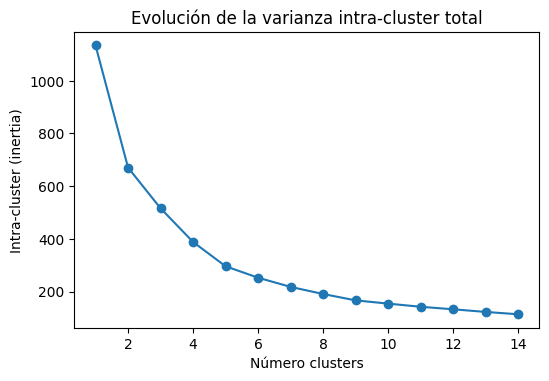

In [32]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias_Kmeans = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(n_clusters=n_clusters, n_init= 20, random_state = 123)
    modelo_kmeans.fit(df_1_scaled)
    inertias_Kmeans.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias_Kmeans, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

In [33]:
print(inertias_Kmeans)

[1134.0000000000005, 670.4670800129404, 515.9505611137564, 388.1571535175229, 295.91739974578365, 252.5742243079458, 217.61442314404405, 190.68043505725726, 166.5162256468657, 154.22173404509718, 142.20634949105485, 132.64472206570855, 122.68676821202936, 113.75179714745329]


In [34]:
from sklearn.metrics import silhouette_score

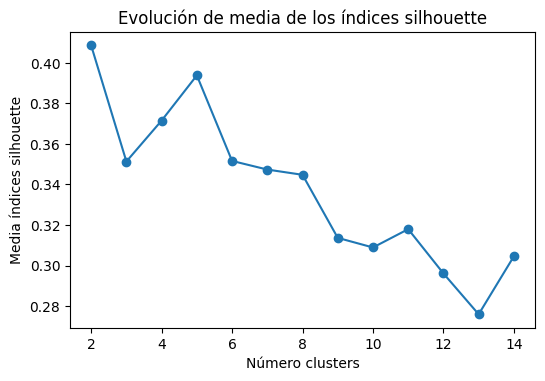

In [36]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette_Kmeans = []

for n_clusters in range_n_clusters:
    #Crear modelo KMedias
    modelo_kmeans = KMeans(n_clusters=n_clusters,n_init= 20,random_state = 123)

    cluster_labels = modelo_kmeans.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Kmeans.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette_Kmeans, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [37]:
print(valores_medios_silhouette_Kmeans)

[np.float64(0.4085334521377876), np.float64(0.35131141060297927), np.float64(0.37150385148900644), np.float64(0.3937815117854225), np.float64(0.3515954780038756), np.float64(0.3473428902361229), np.float64(0.3447552257823096), np.float64(0.31365739476389815), np.float64(0.3089147944224012), np.float64(0.3179502668154318), np.float64(0.29611132733357), np.float64(0.27596885383432435), np.float64(0.3045697364951431)]


In [50]:
modelo_kmeans_definitivo = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans_definitivo.fit(X=df_1_scaled)

df_1['cluster']=modelo_kmeans_definitivo.labels_
pd.set_option('display.max_rows',None)
df_1

,gdppc,deathrate,lifeE,infantD,birthsCR,fer,cluster
0,629,10.9,57.1,44.7,42.7,6.1,3
1,689,12.7,53.6,13.5,35.0,4.7,3
2,691,10.3,58.2,31.5,41.2,5.5,3
3,751,9.4,60.4,222.3,41.2,5.9,3
4,801,7.4,63.5,7.5,33.6,4.4,3
5,949,9.3,60.8,59.7,47.5,7.1,3
6,1134,7.0,64.1,40.6,36.1,4.4,3
7,1196,9.6,59.4,73.6,38.2,5.1,3
8,1252,6.5,66.0,5.5,31.0,4.0,3
9,1282,8.6,61.2,23.2,35.0,4.7,3


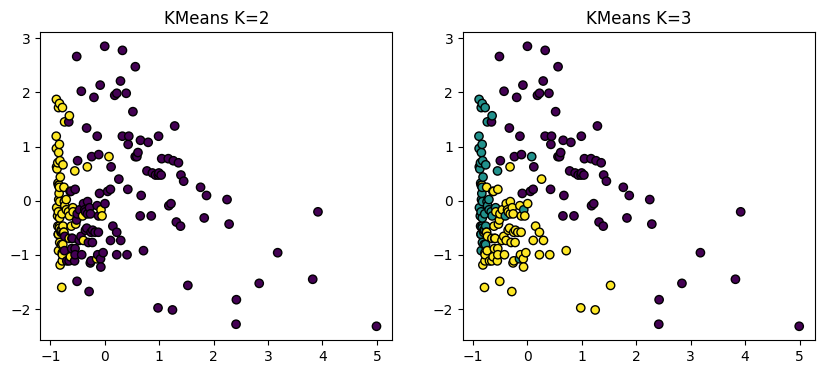

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_predict2 = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=df_1_scaled)
ax[0].scatter(
        x = df_1_scaled[:, 0],
        y = df_1_scaled[:, 1],
        c = y_predict2,
        cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

y_predict3 = KMeans(n_clusters=3, n_init=25, random_state=123).fit_predict(X=df_1_scaled)
ax[1].scatter(
        x = df_1_scaled[:, 0],
        y = df_1_scaled[:, 1],
        c = y_predict3,
        cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=3');

In [53]:
y_predict3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [54]:
ResultKmeans= pd.DataFrame(y_predict3)
ResultKmeans.rename(columns={0:"Cluster"},inplace=True)
ResultKmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cluster  189 non-null    int32
dtypes: int32(1)
memory usage: 888.0 bytes


In [56]:
df_all = pd.concat([df,ResultKmeans],axis=1)
df_all.info()
df_all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          189 non-null    int64  
 1   country     189 non-null    object 
 2   income      189 non-null    int64  
 3   continent   189 non-null    object 
 4   region      189 non-null    object 
 5   gdppc       189 non-null    int64  
 6   death       189 non-null    float64
 7   mdeath      189 non-null    float64
 8   fdeath      189 non-null    float64
 9   deathrate   189 non-null    float64
 10  lifeE       189 non-null    float64
 11  lifeEM      189 non-null    float64
 12  lifeEF      189 non-null    float64
 13  infantD     189 non-null    float64
 14  infantMR    189 non-null    float64
 15  underfiveM  189 non-null    float64
 16  births      189 non-null    float64
 17  birthsCR    189 non-null    float64
 18  fer         189 non-null    float64
 19  Cluster     189 non-null    i

,id,country,income,continent,region,gdppc,death,mdeath,fdeath,deathrate,lifeE,lifeEM,lifeEF,infantD,infantMR,underfiveM,births,birthsCR,fer,Cluster
0,2384,Somalia,1,Africa,Eastern Africa,629,165.4,88.5,76.9,10.9,57.1,55.5,58.9,44.7,68.7,113.7,650.7,42.7,6.1,1
1,3149,Central African Republic,1,Africa,Middle Africa,689,60.7,32.0,28.7,12.7,53.6,51.6,55.6,13.5,80.4,127.8,167.2,35.0,4.7,1
2,1194,Burundi,1,Africa,Eastern Africa,691,115.9,62.3,53.6,10.3,58.2,56.2,60.3,31.5,68.0,107.7,463.2,41.2,5.5,1
3,3404,"Congo, Dem. Rep.",1,Africa,Middle Africa,751,795.9,417.2,378.6,9.4,60.4,58.9,62.0,222.3,64.1,98.9,3465.6,41.2,5.9,1
4,5699,Liberia,1,Africa,Western Africa,801,36.3,18.8,17.5,7.4,63.5,62.5,64.5,7.5,45.7,61.8,163.4,33.6,4.4,1
5,5954,Niger,1,Africa,Western Africa,949,207.9,109.5,98.4,9.3,60.8,59.8,61.9,59.7,56.0,101.6,1064.7,47.5,7.1,1
6,1789,Malawi,1,Africa,Eastern Africa,1134,134.2,71.5,62.6,7.0,64.1,61.4,66.6,40.6,58.5,72.8,693.5,36.1,4.4,1
7,2044,Mozambique,1,Africa,Eastern Africa,1196,293.1,153.3,139.8,9.6,59.4,57.2,61.5,73.6,63.0,93.5,1167.7,38.2,5.1,1
8,1449,Eritrea,1,Africa,Eastern Africa,1252,33.6,18.2,15.3,6.5,66.0,63.8,68.2,5.5,33.8,43.1,161.1,31.0,4.0,1
9,5529,Guinea,1,Africa,Western Africa,1282,113.2,57.3,55.9,8.6,61.2,60.6,61.8,23.2,50.6,78.9,458.4,35.0,4.7,1


In [59]:
pd.reset_option('display.max_rows')


element_counts = df_all["Cluster"].value_counts()
element_counts

,count
Cluster,
2,74
0,64
1,51


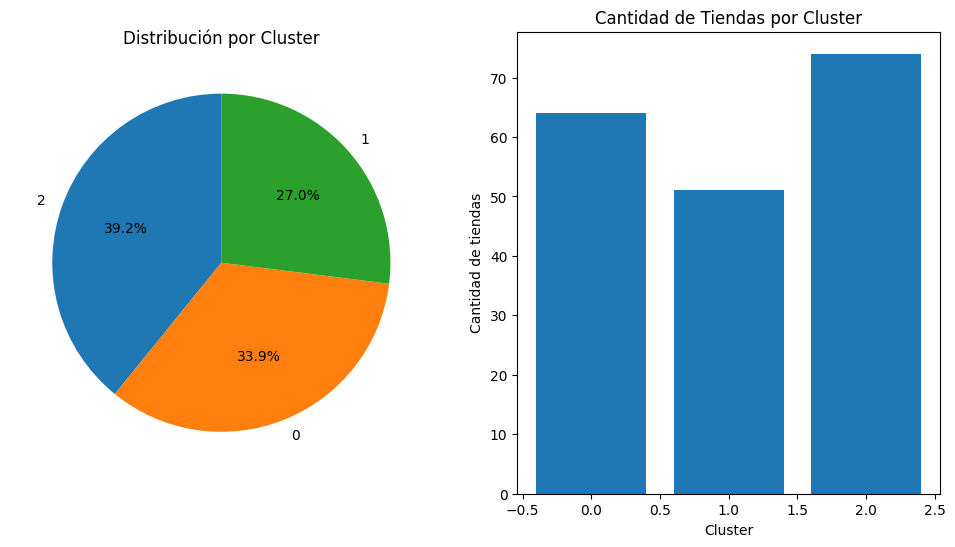

In [60]:
# Crear una figura con dos subplots (uno para el gráfico circular y otro para el gráfico de barras)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico circular
ax1.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Distribución por Cluster")

# Gráfico de barras

# Gráfico de barras
ax2.bar(element_counts.index, element_counts.values)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Cantidad de tiendas")
ax2.set_title("Cantidad de Tiendas por Cluster")


# Mostrar la figura con ambos gráficos
plt.show()

In [61]:
pd.value_counts(df_all.Cluster)

,count
Cluster,
2,74
0,64
1,51


In [66]:
promedios = df_all.groupby("Cluster")[["gdppc", "deathrate", "lifeE", "infantD", "birthsCR","fer"]].mean()
promedios

,gdppc,deathrate,lifeE,infantD,birthsCR,fer
Cluster,,,,,,
0,38273.484375,9.376563,78.809375,1.164062,10.896875,1.643750
1,3625.333333,8.262745,62.319608,65.474510,34.096078,4.503922
2,12577.500000,5.974324,73.591892,11.659459,19.147297,2.385135


In [67]:
from sklearn.preprocessing import MinMaxScaler

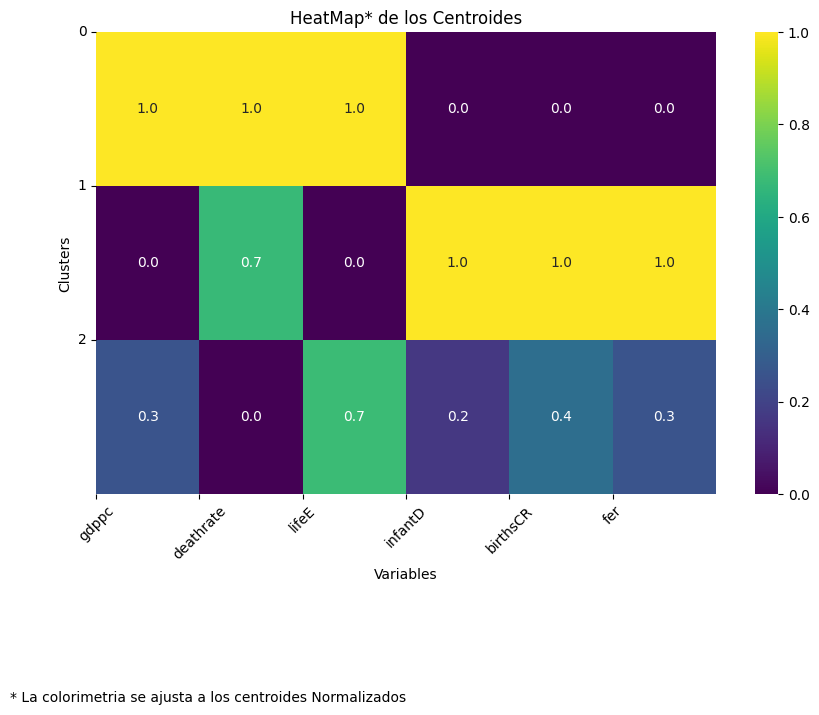

In [68]:
# Calcular los promedios originales
averages_original = Centroides[[
                'gdppc',
                'deathrate',
                'lifeE',
                'infantD',
                'birthsCR',
                'fer'
    ]].mean()

# Normalizar los valores de las características
scaler = MinMaxScaler()
averages_scaled = scaler.fit_transform(averages)

# Crear un mapa de calor con colores personalizados para cada característica
plt.figure(figsize=(10, 6))
sns.heatmap(averages_scaled, annot=True, cmap="viridis", fmt=".1f")

# Personalizar las etiquetas de los ejes
feature_names = ["gdppc", "deathrate", "lifeE", "infantD", "birthsCR","fer"]
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45, ha="center")
plt.yticks(ticks=range(len(averages.index)), labels=averages.index, rotation=0)

# Personalizar el gráfico (opcional)
plt.title("HeatMap* de los Centroides")
plt.xlabel("Variables")
plt.ylabel("Clusters")
plt.text(0.5, -0.45, "* La colorimetria se ajusta a los centroides Normalizados", transform=plt.gca().transAxes, ha="right")

# Mostrar el gráfico
plt.show()

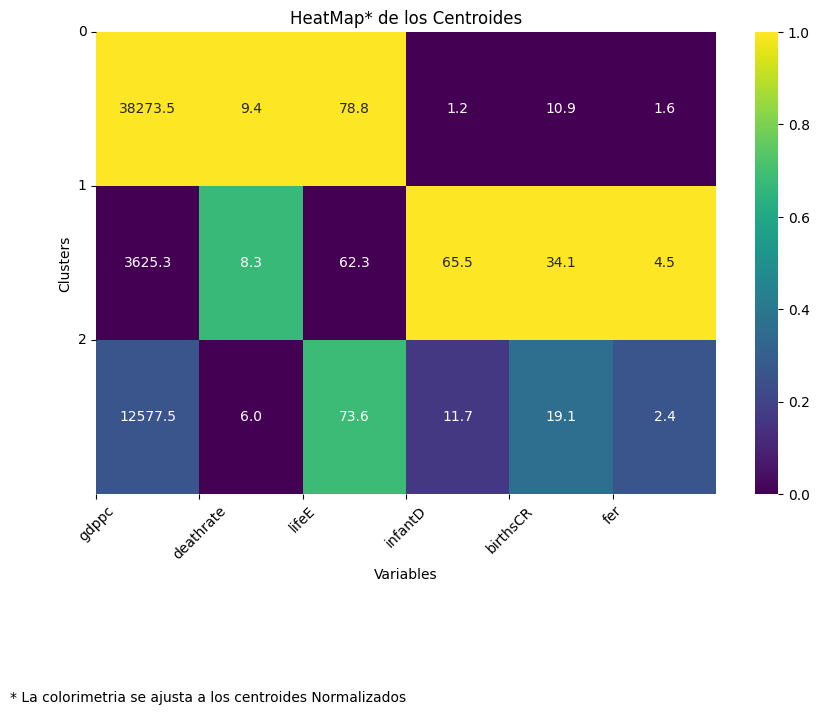

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Calcular los promedios originales
averages_original = Centroides[[
                'gdppc',
                'deathrate',
                'lifeE',
                'infantD',
                'birthsCR',
                'fer'
    ]].mean()

# Normalizar los valores de las características
scaler = MinMaxScaler()
averages_scaled = scaler.fit_transform(averages)

# Crear un mapa de calor con colores personalizados para cada característica
plt.figure(figsize=(10, 6))
sns.heatmap(averages_scaled, annot=averages_original, cmap="viridis", fmt=".1f")

# Personalizar las etiquetas de los ejes
feature_names = ["gdppc", "deathrate", "lifeE", "infantD", "birthsCR","fer"]
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45, ha="center")
plt.yticks(ticks=range(len(averages.index)), labels=averages.index, rotation=0)

# Personalizar el gráfico (opcional)
plt.title("HeatMap* de los Centroides")
plt.xlabel("Variables")
plt.ylabel("Clusters")
plt.text(0.5, -0.45, "* La colorimetria se ajusta a los centroides Normalizados", transform=plt.gca().transAxes, ha="right")

# Mostrar el gráfico
plt.show()

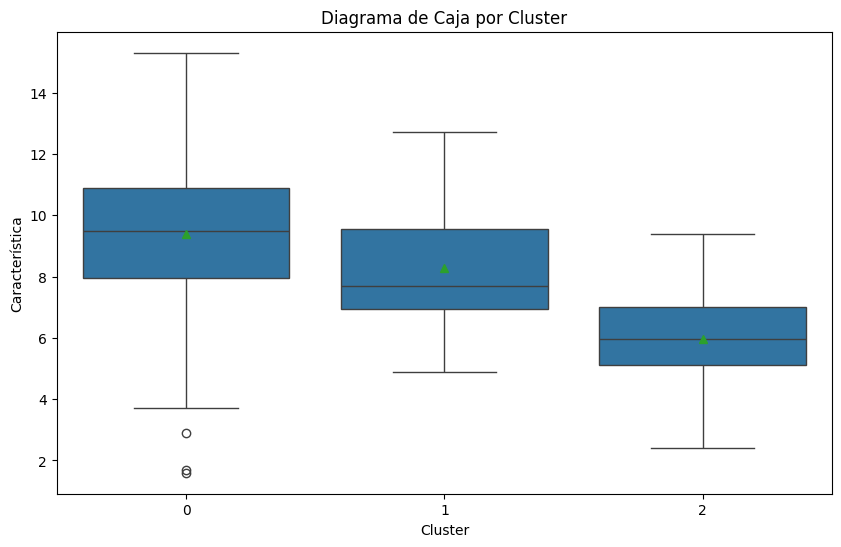

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='deathrate',showmeans=True,data=df_all)

# Personalizar el gráfico (opcional)
plt.title("Diagrama de Caja por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Característica")

# Mostrar el gráfico
plt.show()

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          189 non-null    int64  
 1   country     189 non-null    object 
 2   income      189 non-null    int64  
 3   continent   189 non-null    object 
 4   region      189 non-null    object 
 5   gdppc       189 non-null    int64  
 6   death       189 non-null    float64
 7   mdeath      189 non-null    float64
 8   fdeath      189 non-null    float64
 9   deathrate   189 non-null    float64
 10  lifeE       189 non-null    float64
 11  lifeEM      189 non-null    float64
 12  lifeEF      189 non-null    float64
 13  infantD     189 non-null    float64
 14  infantMR    189 non-null    float64
 15  underfiveM  189 non-null    float64
 16  births      189 non-null    float64
 17  birthsCR    189 non-null    float64
 18  fer         189 non-null    float64
 19  Cluster     189 non-null    i

Haga un resumen con las variables Cualitativas Localidad, Atencion, TipoCanal (Tipo de tienda)


In [ ]:
import pandas as pd

cluster_groups = df_all.groupby('Cluster')

for cluster, group in cluster_groups:
    total_count = len(group)
    print(f"Cluster {cluster}:")
    for feature in ['continent']:
        feature_counts = group[feature].value_counts(normalize=True) * 100
        print(f"\t{feature}:")
        for category, percent in feature_counts.items():
            print(f"\t\t{category}: {percent:.2f}%")
    print("\n")


Cluster 0:
	continent:
		Europa: 59.38%
		Asia: 21.88%
		America: 12.50%
		Africa: 3.12%
		Oceania: 3.12%


Cluster 1:
	continent:
		Asia: 41.89%
		America: 36.49%
		Africa: 12.16%
		Oceania: 8.11%
		Europa: 1.35%


Cluster 2:
	continent:
		Africa: 84.31%
		Asia: 11.76%
		Oceania: 3.92%




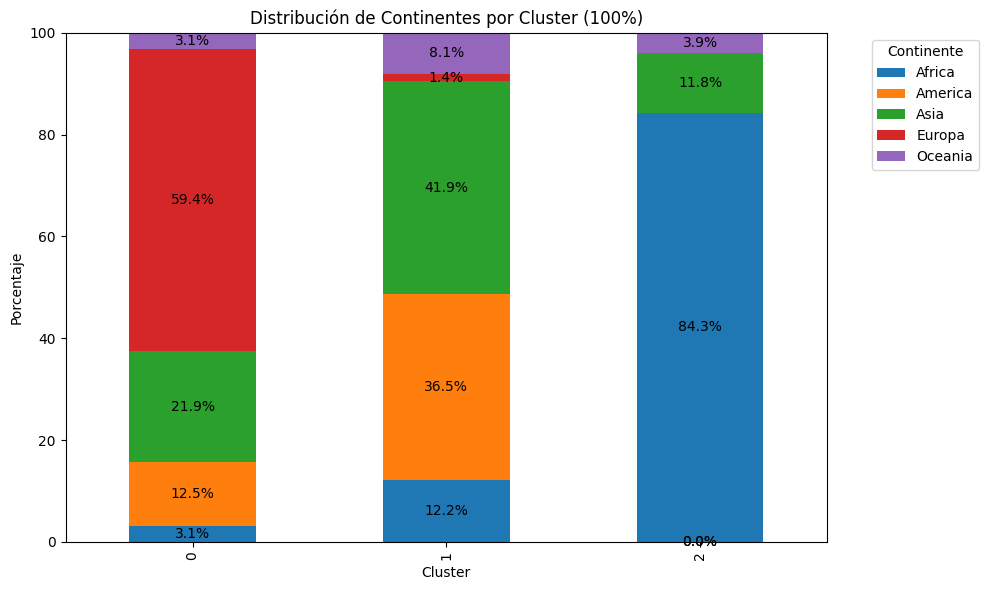

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribución por Cluster y Continente

# 1. Calcular porcentajes por cluster y continente
cluster_continente = df_all.groupby(['Cluster', 'continent']).size().unstack(fill_value=0)
cluster_continente_porcentaje = cluster_continente.apply(lambda x: x / x.sum() * 100, axis=1)

# 2. Crear el gráfico de barras agrupadas
ax = cluster_continente_porcentaje.plot(kind='bar', stacked=True, figsize=(10, 6))

# 3. Agregar etiquetas a las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

# 4. Personalizar el gráfico
plt.title('Distribución de Continentes por Cluster (100%)')
plt.xlabel('Cluster')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)  # Establecer límite del eje y en 100%

# 5. Mostrar la leyenda
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mostrar leyenda fuera del gráfico

# 6. Mostrar el gráfico
plt.tight_layout()  # Ajustar diseño para evitar etiquetas cortadas
plt.show()

## **Clustering + PCA**

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
df_1_scaled = scaler.fit_transform(df_1)

# Realizar el Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
Y = pca.fit_transform(df_1_scaled)

ResultPCA= pd.DataFrame(Y)
ResultPCA.rename(columns={0:"PC1",1:"PC2"},inplace=True)

df_all = pd.concat([df_all,ResultPCA],axis=1)
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          189 non-null    int64  
 1   country     189 non-null    object 
 2   income      189 non-null    int64  
 3   continent   189 non-null    object 
 4   region      189 non-null    object 
 5   gdppc       189 non-null    int64  
 6   death       189 non-null    float64
 7   mdeath      189 non-null    float64
 8   fdeath      189 non-null    float64
 9   deathrate   189 non-null    float64
 10  lifeE       189 non-null    float64
 11  lifeEM      189 non-null    float64
 12  lifeEF      189 non-null    float64
 13  infantD     189 non-null    float64
 14  infantMR    189 non-null    float64
 15  underfiveM  189 non-null    float64
 16  births      189 non-null    float64
 17  birthsCR    189 non-null    float64
 18  fer         189 non-null    float64
 19  Cluster     189 non-null    i

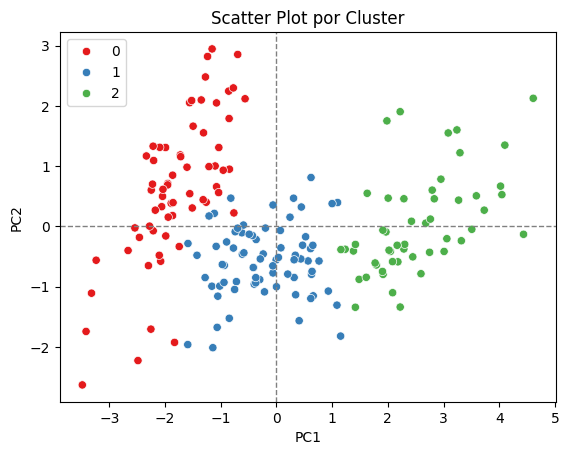

In [ ]:
# Crea el scatter plot con colores según la columna "Localidad"
sns.scatterplot(data=df_all, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot por Cluster')
# Agrega las rectas y=0 y x=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

plt.legend()  # Muestra la leyenda con los colores correspondientes
plt.show()

## K-Medoides

## Clustering Jerárquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [ ]:
modelo_hclust = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',  # 'ward','complete', 'single'
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust.fit(X=df_1_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
## Funcion para crear en dendrograma a partir de las distancias y la iteración e ingreso de nodos hijos/terminales a un nuevo grupo (o no)
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Dendrograma')

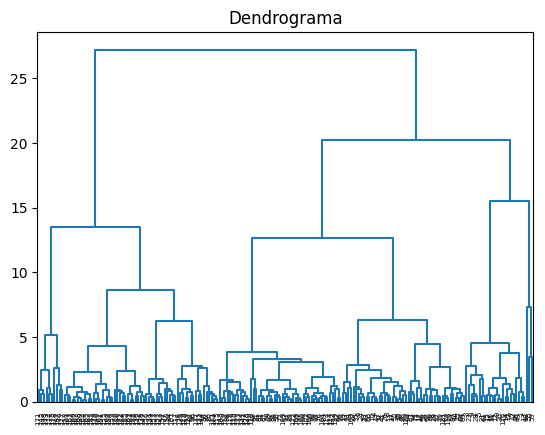

In [ ]:
plot_dendrogram(modelo_hclust, color_threshold=0)
plt.title('Dendrograma')


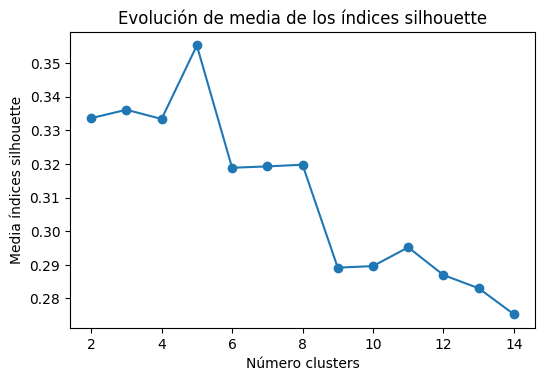

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette_Jerarquico = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_1_scaled)
    silhouette_avg = silhouette_score(df_1_scaled, cluster_labels)
    valores_medios_silhouette_Jerarquico.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette_Jerarquico, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');


In [ ]:
print(valores_medios_silhouette_Jerarquico)

[np.float64(0.3335921042018998), np.float64(0.33609880523722735), np.float64(0.33335496654882113), np.float64(0.3552093842057863), np.float64(0.3188446078093474), np.float64(0.3192519726423284), np.float64(0.31975140476489566), np.float64(0.28914056730838883), np.float64(0.2896012382899763), np.float64(0.2951843495480227), np.float64(0.28694210289627264), np.float64(0.2830182840628513), np.float64(0.2752730854211599)]


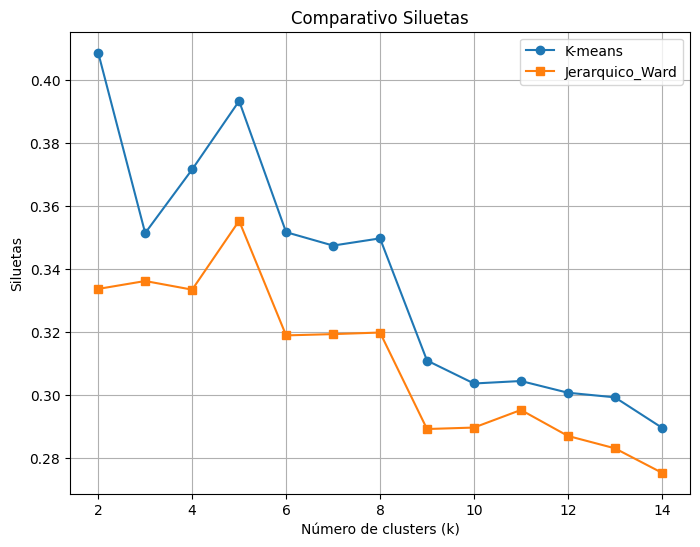

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), valores_medios_silhouette_Kmeans, marker='o', label='K-means')
plt.plot(range(2, 15), valores_medios_silhouette_Jerarquico, marker='s', label='Jerarquico_Ward')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Siluetas')
plt.title('Comparativo Siluetas')
plt.legend()
plt.grid()
plt.show()

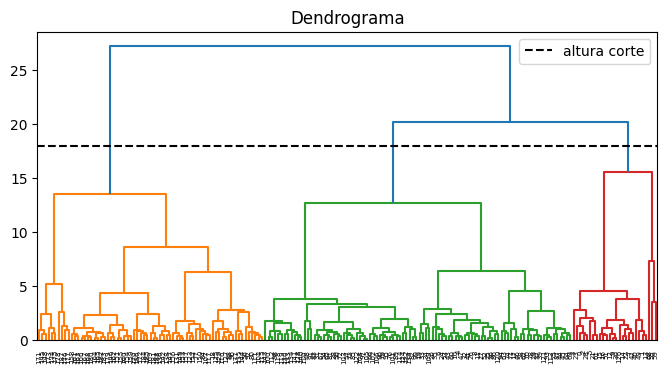

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 18
plot_dendrogram(modelo_hclust, color_threshold=altura_corte, ax=ax)
ax.set_title("Dendrograma")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

In [ ]:
modelo_hclust_def = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 3
                     )
modelo_hclust_def.fit(X=df_1_scaled)

AgglomerativeClustering(n_clusters=3)

In [ ]:
y_predict5 = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 3).fit_predict(X=df_1_scaled)



In [ ]:
y_predict5

array([0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
ResultJerar= pd.DataFrame(y_predict5)  ##Convierto a pd
ResultJerar.rename(columns={0:"ClusterJerar"},inplace=True)
ResultJerar.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ClusterJerar  189 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [ ]:
df_all = pd.concat([df_all,ResultJerar],axis=1)
df_all.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            189 non-null    int64  
 1   country       189 non-null    object 
 2   income        189 non-null    int64  
 3   continent     189 non-null    object 
 4   region        189 non-null    object 
 5   gdppc         189 non-null    int64  
 6   death         189 non-null    float64
 7   mdeath        189 non-null    float64
 8   fdeath        189 non-null    float64
 9   deathrate     189 non-null    float64
 10  lifeE         189 non-null    float64
 11  lifeEM        189 non-null    float64
 12  lifeEF        189 non-null    float64
 13  infantD       189 non-null    float64
 14  infantMR      189 non-null    float64
 15  underfiveM    189 non-null    float64
 16  births        189 non-null    float64
 17  birthsCR      189 non-null    float64
 18  fer           189 non-null    

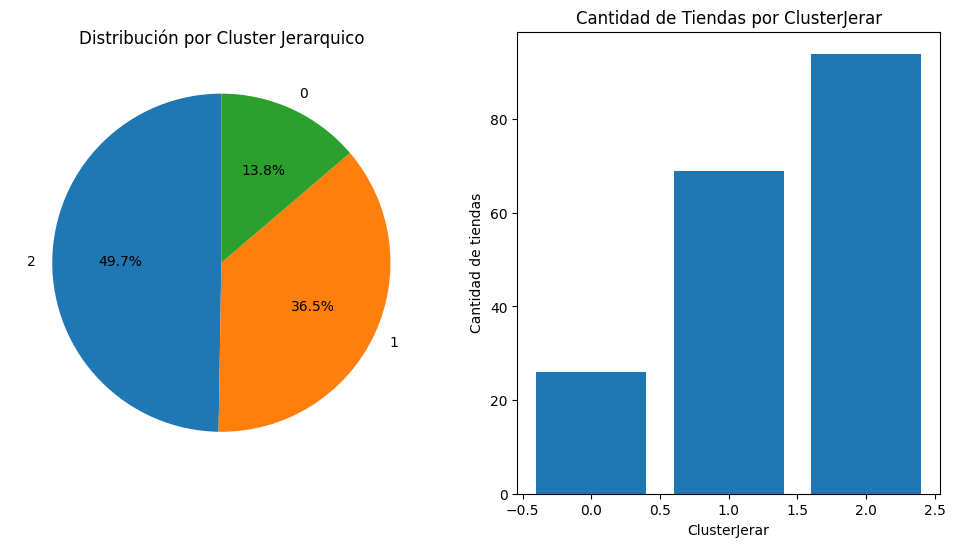

In [ ]:
element_counts = df_all["ClusterJerar"].value_counts()

# Crear una figura con dos subplots (uno para el gráfico circular y otro para el gráfico de barras)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico circular
ax1.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Distribución por Cluster Jerarquico")

# Gráfico de barras
ax2.bar(element_counts.index, element_counts.values)
ax2.set_xlabel("ClusterJerar")
ax2.set_ylabel("Cantidad de tiendas")
ax2.set_title("Cantidad de Tiendas por ClusterJerar")


# Mostrar la figura con ambos gráficos
plt.show()

In [ ]:
pd.value_counts(df_all.ClusterJerar)


,count
ClusterJerar,
2,94
1,69
0,26


In [ ]:
# Matriz/Tabla cruzada para comprobar diferencias en volúmenes de registros entre K-Means y Jerárquico
pd.crosstab(df_all.Cluster,df_all.ClusterJerar)


ClusterJerar,0,1,2
Cluster,,,
0,0,63,1
1,0,6,68
2,26,0,25


## Como es el performance de Jerarquico Single y Complete (Linkage) vs todos los demas?